In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

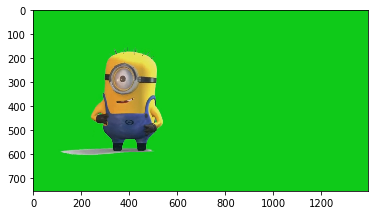

In [2]:
img = cv2.imread('./Minion-Image.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

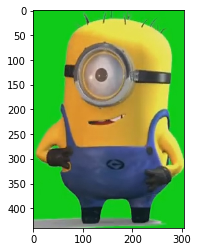

In [3]:
# create model (crop)
model_bgr = img.copy()
model_bgr = model_bgr[155:595,235:540]
plt.imshow(cv2.cvtColor(model_bgr, cv2.COLOR_BGR2RGB))

In [4]:
# import video file
video = cv2.VideoCapture('./Minion.mp4')

if video.isOpened():
    print('Video file is opened successfully')
else:
    print('Error')

Video file is opened successfully


In [5]:
while True:
    retval, img = video.read()
    if (retval):
        # Create model
        model_bgr = img.copy()
        model_bgr = model_bgr[155:595,235:540]
        
        #Convert bgr to hsv
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        model_hsv = cv2.cvtColor(model_bgr, cv2.COLOR_BGR2HSV)
        
        # Compute histogram from h,s model
        model_hist_hs = cv2.calcHist([model_hsv], [0,1], None, [180,256], [0,180,0,256])
                                        # image, channel, mask, bin, range
        
        # Normalize hist model to 0-255 value
        model_hist_hs_norm = model_hist_hs.copy()
        model_hist_hs_norm = cv2.normalize( model_hist_hs, model_hist_hs_norm, 0, 255, cv2.NORM_MINMAX)
                                        #image_source, image_destination, min, max, normalize
        
        # Black projection
        main_probmap1 = cv2.calcBackProject([img_hsv], [0,1], model_hist_hs_norm, [0,180,0,256], 1)
                                        # main image hsv, channel, histogram  , range , scale factor
        
        # ปรับให้สว่างขึ้นด้วย kernel วงกลม
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
        main_probmap2 = cv2.filter2D(main_probmap1, -1, kernel)
        
        # Morphological
        ksize = 3
        dilate = 3
        erode = 2
        
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))
        
        morph_result = cv2.dilate(main_probmap2, kernel, iterations = dilate)
        morph_result = cv2.erode(morph_result, kernel, iterations = erode)
        
        # แสดงผล
        result = img.copy()
        result[morph_result == 255] = 0
        # ไม่รู้ทำไมรูปมินเนี่ยนมันเป็นสีดำ แล้วพื้นหลังดันเป็นสีขาว เลยต้องกำหนดให้
        # พื้นที่ที่เป็นสีขาว มันเท่ากับ 0 แทน
#         result_2 = cv2.bitwise_xor(img, cv2.cvtColor(morph_result, cv2.COLOR_GRAY2BGR))
        # พอใช้ xor แล้วพื้นหลังสีเพี้ยน
        
        cv2.imshow('Video', result)
    else:
        print('Error')
        
    if (cv2.waitKey(30)==27):
        break
        
cv2.destroyAllWindows()
if video.isOpened():
    video.release()

In [6]:
cv2.destroyAllWindows()
if video.isOpened():
    video.release()